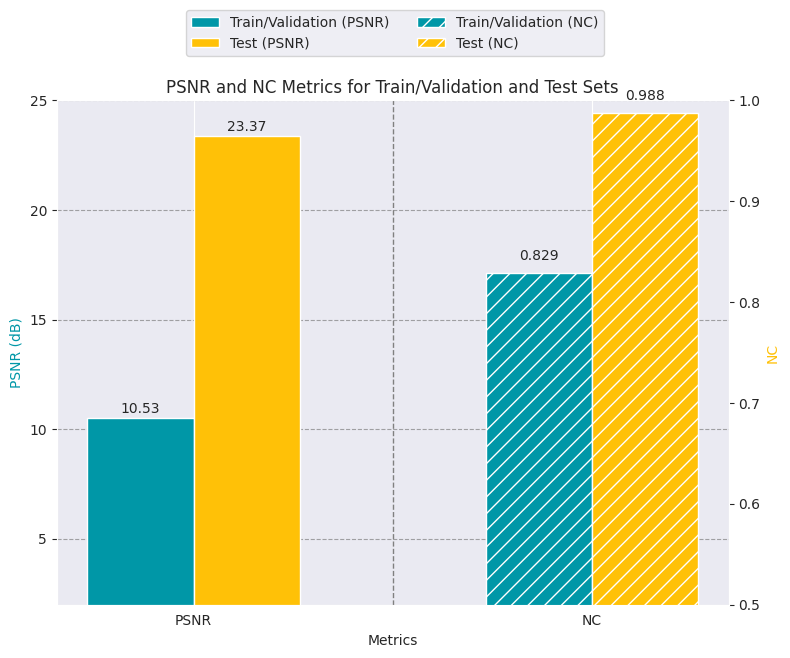

In [3]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns  # Import seaborn

# Apply the seaborn style
sns.set_style("darkgrid")  # Set the background grid style

categories = ['PSNR', 'NC']
train_val = [10.53, 0.8286]  # Updated Train/Validation values
test = [23.37, 0.9879]  # Updated Test values

x = np.array([0, 1.5])  # Balanced gap between PSNR and NC
bar_width = 0.4

# Create the figure and twin axes
fig, ax1 = plt.subplots(figsize=(8, 6))  # Standard width for clarity
ax2 = ax1.twinx()  # Secondary y-axis

# Plot PSNR (left axis)
psnr_bars_train = ax1.bar(x[0] - bar_width / 2, [train_val[0]], bar_width, label='Train/Validation (PSNR)', color='#0097A7')
psnr_bars_test = ax1.bar(x[0] + bar_width / 2, [test[0]], bar_width, label='Test (PSNR)', color='#FFC107')

# Plot NC (right axis)
nc_bars_train = ax2.bar(x[1] - bar_width / 2, [train_val[1]], bar_width, label='Train/Validation (NC)', color='#0097A7', hatch='//')
nc_bars_test = ax2.bar(x[1] + bar_width / 2, [test[1]], bar_width, label='Test (NC)', color='#FFC107', hatch='//')

# Add labels above bars
for i, v in enumerate([train_val[0], test[0]]):
    ax1.text(x[0] + (i - 0.5) * bar_width, v + 0.1, f'{v:.2f}', ha='center', va='bottom', fontsize=10)
for i, v in enumerate([train_val[1], test[1]]):
    ax2.text(x[1] + (i - 0.5) * bar_width, v + 0.01, f'{v:.3f}', ha='center', va='bottom', fontsize=10)

# Add vertical separation line
plt.axvline(x=(x[0] + x[1]) / 2, color='gray', linestyle='--', linewidth=1)  # Adjusted for new spacing

# Customize axes
ax1.set_ylabel('PSNR (dB)', color='#0097A7')
ax2.set_ylabel('NC', color='#FFC107')
ax1.set_xlabel('Metrics')
ax1.set_xticks(x)
ax1.set_xticklabels(categories)
ax1.set_title('PSNR and NC Metrics for Train/Validation and Test Sets')

# Adjust scales for better comparison
ax1.set_ylim(2, 25)  # Adjusted PSNR range
ax2.set_ylim(0.5, 1)  # Adjusted NC range to start at 0.5

# Uniform gridlines
ax1.yaxis.grid(True, linestyle='--', which='major', color='gray', alpha=0.7)
ax2.yaxis.grid(False)  # Avoid duplicate grids

# Combine legends
fig.legend(loc='upper center', bbox_to_anchor=(0.5, 1.1), ncol=2)

# Save the figure locally as a PNG file
plt.savefig('psnr_nc_metrics_adjusted_seaborn.png', bbox_inches='tight')

# Final layout adjustment and show
plt.tight_layout()
plt.show()


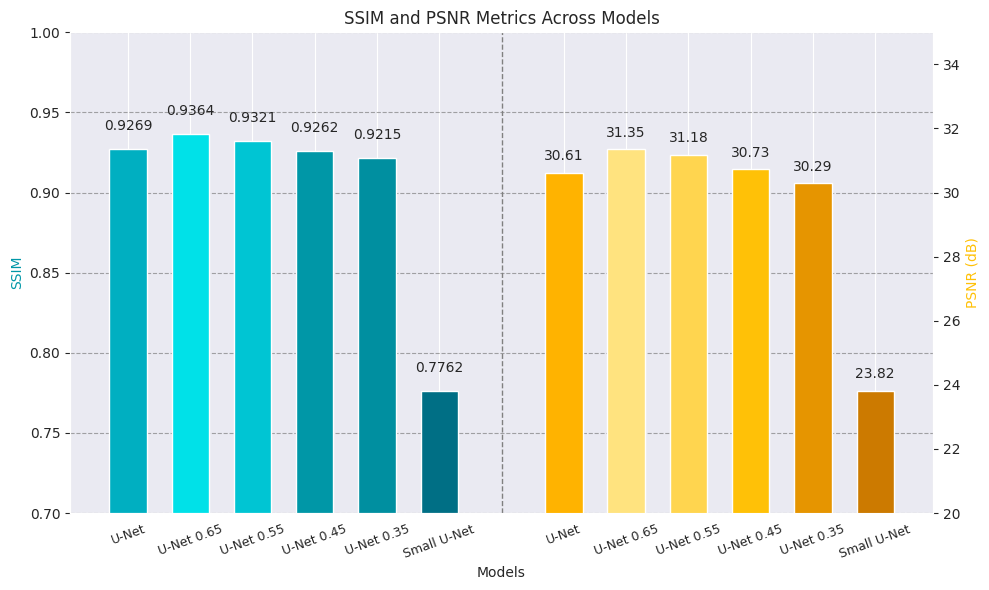

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# Apply seaborn style
sns.set_style("darkgrid")

# Define models (keeping Small U-Net as the rightmost entry)
models = ["U-Net", "U-Net 0.65", "U-Net 0.55", "U-Net 0.45", "U-Net 0.35", "Small U-Net"]

# PSNR and SSIM values (matching the reordered model sequence)
psnr_values = np.array([30.61, 31.35, 31.18, 30.73, 30.29, 23.82])  # PSNR (dB)
ssim_values = np.array([0.9269, 0.9364, 0.9321, 0.9262, 0.9215, 0.7762])  # SSIM

# Define x locations for bars (Separate left and right groups)
x_ssim = np.arange(len(models))  # SSIM group
x_psnr = x_ssim + len(models) + 1  # PSNR group (offset for separation)
bar_width = 0.6

# Sort SSIM & PSNR values to determine color ordering (lighter for higher values)
ssim_sorted_indices = np.argsort(ssim_values)[::-1]  # Highest values first
psnr_sorted_indices = np.argsort(psnr_values)[::-1]  # Highest values first

# Define fixed color gradients (lighter colors for higher values, darker for lower)
ssim_colors_gradient = ['#00E1E8', '#00C5D3', '#00AFC1', '#0097A7', '#008FA0', '#006F85']
psnr_colors_gradient = ['#FFE37F', '#FFD54F', '#FFC107', '#FFB300', '#E69500', '#CC7A00']

# Map colors based on sorted order (higher values get lighter colors)
ssim_colors = [ssim_colors_gradient[np.where(ssim_sorted_indices == i)[0][0]] for i in range(len(models))]
psnr_colors = [psnr_colors_gradient[np.where(psnr_sorted_indices == i)[0][0]] for i in range(len(models))]

# Create figure and twin axes
fig, ax1 = plt.subplots(figsize=(10, 6))
ax2 = ax1.twinx()  # Secondary y-axis for PSNR

# Plot SSIM on left axis
for i in range(len(models)):
    ax1.bar(x_ssim[i], ssim_values[i], bar_width, color=ssim_colors[i])

# Plot PSNR on right axis
for i in range(len(models)):
    ax2.bar(x_psnr[i], psnr_values[i], bar_width, color=psnr_colors[i])

# Add labels above bars
for i, v in enumerate(ssim_values):
    ax1.text(x_ssim[i], v + 0.01, f'{v:.4f}', ha='center', va='bottom', fontsize=10)
for i, v in enumerate(psnr_values):
    ax2.text(x_psnr[i], v + 0.3, f'{v:.2f}', ha='center', va='bottom', fontsize=10)

# Add vertical separation line exactly in the middle
middle_x = (x_psnr[0] + x_ssim[-1]) / 2
plt.axvline(x=middle_x, color='gray', linestyle='--', linewidth=1)

# Customize axes
ax1.set_ylabel("SSIM", color='#0097A7')
ax2.set_ylabel("PSNR (dB)", color='#FFC107')
ax1.set_xlabel("Models")

# Adjust x-axis labels to be smaller
ax1.set_xticks(np.concatenate((x_ssim, x_psnr)))  
ax1.set_xticklabels(models + models, rotation=20, fontsize=9)  # Reduced font size

# Adjust scales for better visibility
ax1.set_ylim(0.7, 1)  # SSIM range
ax2.set_ylim(20, 35)  # PSNR range

# Title
ax1.set_title("SSIM and PSNR Metrics Across Models")

# Grid settings
ax1.yaxis.grid(True, linestyle='--', which='major', color='gray', alpha=0.7)
ax2.yaxis.grid(False)

# Save the figure locally as a PNG file
plt.savefig('psnr_ssim_split_chart_reordered.png', bbox_inches='tight')

# Final layout adjustment and show
plt.tight_layout()
plt.show()
